<a href="https://colab.research.google.com/github/Arjun-RY/Housing_Price_prediction/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housing data prediction

## Package import and installation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv("housing.csv")

print(df.shape )
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df1=df

In [8]:
del df1['CHAS']

In [9]:
df1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
df1.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


In [12]:
df2=df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df2.shape

(448, 13)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new.shape

(288, 13)

## EDA (Exploratory Data Analysis)

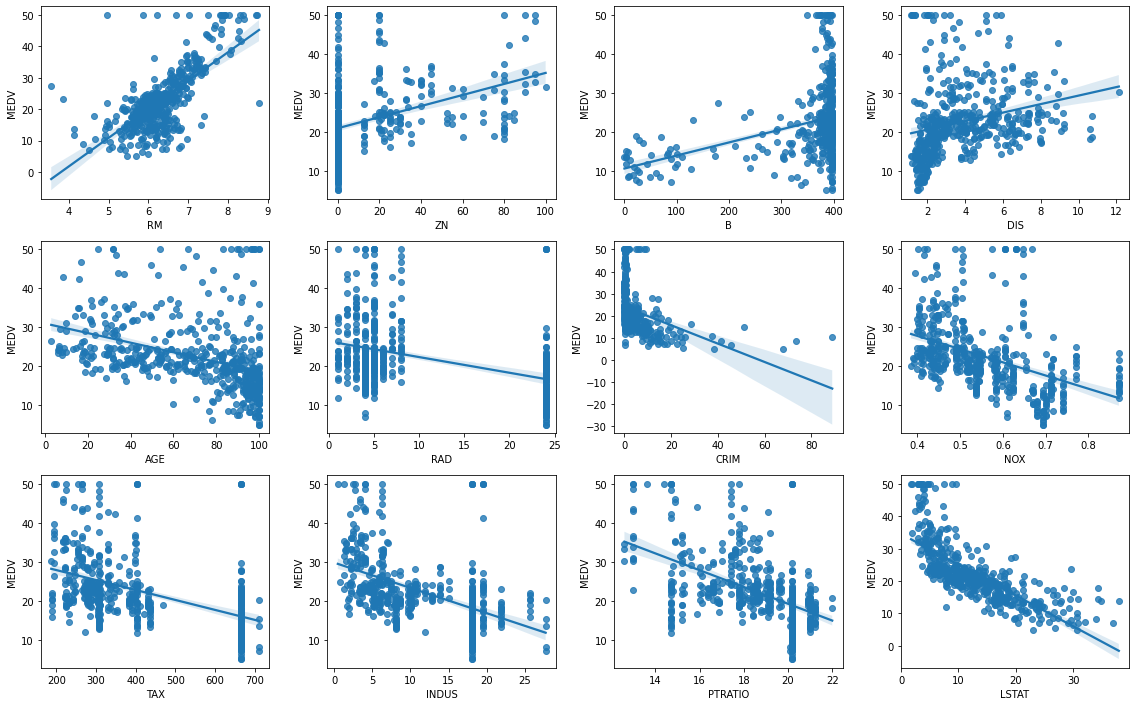

In [14]:
k  = 13
fig = plt.figure(figsize=(16,16))
corrmat = df.corr()
cols = corrmat.nlargest(k, "MEDV")["MEDV"].index

for i in np.arange(1,k):
    X_train = df[cols[i]]
    ax = fig.add_subplot(5,4,i)
    sns.regplot(x=X_train, y=df['MEDV'])

plt.tight_layout()
plt.show()

## Model

In [16]:
from sklearn.model_selection import train_test_split 
feature = ['RM','LSTAT']
x = df[feature]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 2)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_test_lr= regressor.predict(X_test)
print('RSME of linear regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R-squared of linear reg   : ',r2_score(y_test, pred_test_lr))

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME of Ridge regression : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R-squared of Ridge reg   : ',r2_score(y_test, pred_test_rr))

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME of Lasso regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R-squared of Lasso reg   : ',r2_score(y_test, pred_test_lasso))

RSME of linear regression :  4.8614325964292755
R-squared of linear reg   :  0.7175039832076542
RSME of Ridge regression :  4.861424157425782
R-squared of Ridge reg   :  0.7175049639814306
RSME of Lasso regression :  4.86122334094926
R-squared of Lasso reg   :  0.7175283021984767


###Without outlier removal and feature selection 

Linear, Ridge and Lassi regression

In [17]:
from sklearn.model_selection import train_test_split 
feature = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = df[feature]
y = df.MEDV
from sklearn.model_selection import ShuffleSplit
splits = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#from sklearn.preprocessing import StandardScaler # importing the required function
#scaler = StandardScaler()
#scaler.fit(X_train) 
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_test_lr= regressor.predict(X_test)
print('RSME of linear regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R-squared of linear reg   : ',r2_score(y_test, pred_test_lr))

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME of Ridge regression : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R-squared of Ridge reg   : ',r2_score(y_test, pred_test_rr))

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME of Lasso regression : ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R-squared of Lasso reg   : ',r2_score(y_test, pred_test_lasso))

RSME of linear regression :  4.267424089286025
R-squared of linear reg   :  0.7823215681146345
RSME of Ridge regression :  4.2680821856122435
R-squared of Ridge reg   :  0.7822544248360861
RSME of Lasso regression :  4.287646497875534
R-squared of Lasso reg   :  0.7802536169929771


In [19]:
params = np.append(regressor.intercept_,regressor.coef_)
params = np.round(params,4)

feature = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
myDF= pd.DataFrame()
myDF['Features'],myDF["Coefficients"] = [feature,params]
print(myDF)

   Features  Coefficients
0      CRIM       37.7504
1        ZN       -0.1127
2     INDUS        0.0412
3      CHAS        0.0095
4       NOX      -16.1472
5        RM        3.6991
6       AGE        0.0119
7       DIS       -1.4125
8       RAD        0.3499
9       TAX       -0.0132
10  PTRATIO       -1.0871
11        B        0.0122
12    LSTAT       -0.5738


In [20]:
pred_test_lr= regressor.predict(X_train)
print('RSME of linear regression : ',np.sqrt(mean_squared_error(y_train,pred_test_lr))) 
print('R-squared of linear reg   : ',r2_score(y_train, pred_test_lr))

pred_test_rr= rr.predict(X_train)
print('RSME of Ridge regression : ',np.sqrt(mean_squared_error(y_train,pred_test_rr))) 
print('R-squared of Ridge reg   : ',r2_score(y_train, pred_test_rr))

pred_test_lasso= model_lasso.predict(X_train)
print('RSME of Lasso regression : ',np.sqrt(mean_squared_error(y_train,pred_test_lasso))) 
print('R-squared of Lasso reg   : ',r2_score(y_train, pred_test_lasso))

RSME of linear regression :  4.854237947402628
R-squared of linear reg   :  0.7213710079347528
RSME of Ridge regression :  4.854243252509265
R-squared of Ridge reg   :  0.7213703989175029
RSME of Lasso regression :  4.857755028666955
R-squared of Lasso reg   :  0.7209671069196493


In [ ]:
arr = np.array(X_test)

print(arr[0:,4])


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
